In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig


In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import geopandas
import contextily
from shapely.geometry import Point
import matplotlib.pyplot as plt

**Esercizio 1**

**Dato il nome di una ragione (inserito dall'utente), visualizzare su una mappa i confini della regione e le province di quella regione. Utilizza il colore nero per i confini. Visualizzare anche il nome della provincia. Visualizzare poi un'altra mappa che colori ogni provincia a seconda del numero di comunni presenti. Usare le gradazioni di rosso. Controllare che la regione sia presente nel dataset: in caspo negativo dare un messaggio di errore.** 

In [ ]:
Regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Mappa Italia/Reg01012021_g")
Regioni

COD_RIP  ...                                           geometry
0         1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
1         1  ...  POLYGON ((390652.644 5091766.171, 390748.643 5...
2         1  ...  MULTIPOLYGON (((485536.366 4985444.605, 485366...
3         2  ...  POLYGON ((743267.749 5219765.793, 743387.812 5...
4         2  ...  POLYGON ((768123.960 5175397.497, 768135.210 5...
5         2  ...  MULTIPOLYGON (((872344.457 5061894.048, 872344...
6         1  ...  MULTIPOLYGON (((568226.691 4874823.573, 568219...
7         2  ...  MULTIPOLYGON (((618343.929 4893985.661, 618335...
8         3  ...  MULTIPOLYGON (((674426.642 4680710.364, 674563...
9         3  ...  MULTIPOLYGON (((776982.140 4832209.918, 776910...
10        3  ...  POLYGON ((802303.985 4874996.456, 802366.734 4...
11        3  ...  MULTIPOLYGON (((875952.995 4524692.050, 875769...
12        4  ...  MULTIPOLYGON (((930273.425 4714737.743, 930147...
13        4  ...  POLYGON ((984002.800 4670714.415, 985067.040 4...
14        4  ...  MULTIPOLYGON (((1037313.692 4449410.367, 10373...
15        4  ...  MULTIPOLYGON (((1280636.111 4454459.746, 12806...
16        4  ...  MULTIPOLYGON (((1073707.061 4445700.106, 10737...
17        4  ...  MULTIPOLYGON (((1083358.846 4416348.741, 10833...
18        5  ...  MULTIPOLYGON (((822886.611 3935355.889, 822871...
19        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[20 rows x 6 columns]

In [ ]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Mappa Italia/ProvCM01012021_g')
province 

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

In [ ]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Mappa Italia/Com01012021_g')
comuni

COD_RIP  ...                                           geometry
0           1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1           1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2           1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3           1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4           1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...
...       ...  ...                                                ...
7898        5  ...  MULTIPOLYGON (((556602.772 4375162.650, 556598...
7899        5  ...  POLYGON ((541186.146 4375105.653, 541180.146 4...
7900        5  ...  MULTIPOLYGON (((546451.098 4325900.553, 546443...
7901        5  ...  POLYGON ((500362.475 4361229.767, 500397.474 4...
7902        5  ...  POLYGON ((494131.525 4353208.832, 494847.519 4...

[7903 rows x 13 columns]

In [ ]:
'''nRegione = input('UNA REGIONE: ')
regione1 = Regioni[Regioni["DEN_REG"] == nRegione].geometry.squeeze()
regione1'''

'nRegione = input(\'UNA REGIONE: \')\nregione1 = Regioni[Regioni["DEN_REG"] == nRegione].geometry.squeeze()\nregione1'

In [ ]:
Regioni.dtypes 

COD_RIP          int64
COD_REG          int64
DEN_REG         object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

UNA REGIONE: Lombardia


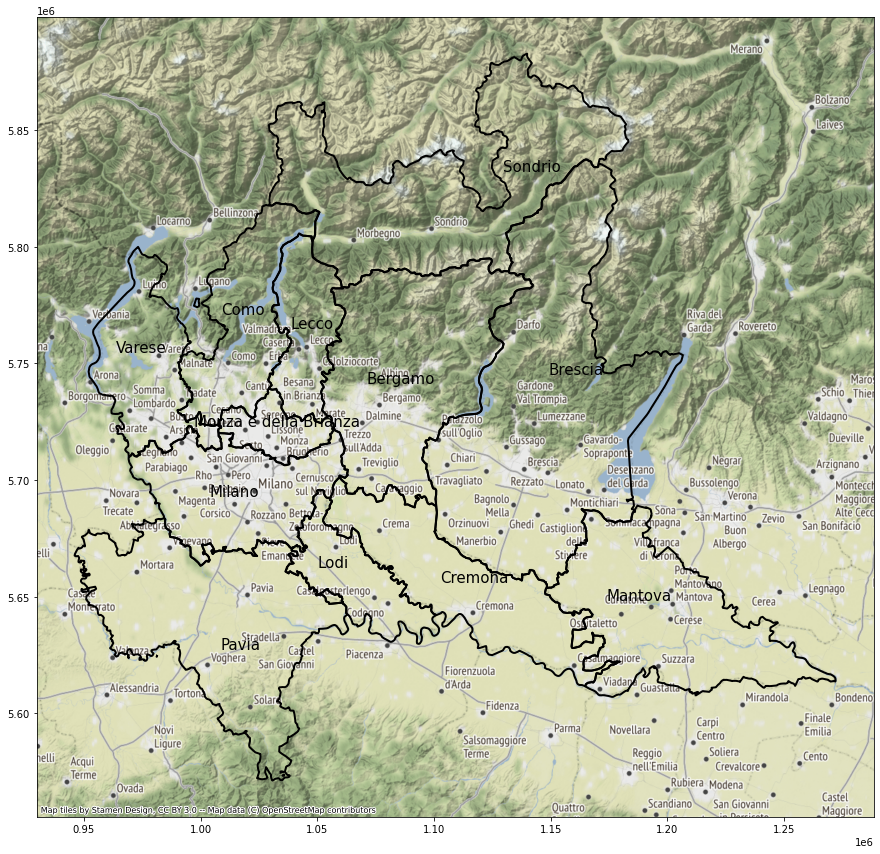

In [ ]:
nRegione = input('UNA REGIONE: ')
if nRegione in list(Regioni.DEN_REG):
  regione1 = Regioni.loc[Regioni["DEN_REG"] == nRegione, 'geometry'].squeeze()
  proReg = province[province.within(regione1)]

  proRegCopy = proReg.copy()
  proRegCopy = proRegCopy.to_crs(epsg=3857)
  proRegCopy["coords"] = proRegCopy["geometry"].apply(lambda x: x.representative_point().coords[:])
  proRegCopy["coords"] = [coords[0] for coords in proRegCopy["coords"]]
  ax = proRegCopy.plot(figsize = (15,15), facecolor="none", edgecolor="k",linewidth=2)
  contextily.add_basemap(ax)
  for idx, row in proRegCopy.iterrows():
    plt.annotate(s=row["DEN_UTS"], xy=row["coords"], horizontalalignment="center", color="k", size=15)  
else:
  print('errore')

In [ ]:
'''nRegione = input('UNA REGIONE: ')
regione1 = Regioni.loc[Regioni["DEN_REG"] == nRegione, 'geometry'].squeeze()
regione1'''

'''ax = proReg .to_crs(epsg=3857).plot(figsize= (10, 10), facecolor="none", edgecolor="k", linewidth=3)
contextily.add_basemap(ax)'''

'''ax = proReg .to_crs(epsg=3857).plot(figsize= (10, 10), facecolor="none", edgecolor="k", linewidth=3)
contextily.add_basemap(ax)'''

'''proRegCopy = proReg.copy()
proRegCopy = proRegCopy.to_crs(epsg=3857)
proRegCopy["coords"] = proRegCopy["geometry"].apply(lambda x: x.representative_point().coords[:])
proRegCopy["coords"] = [coords[0] for coords in proRegCopy["coords"]]
proRegCopy.head()'''

'''ax = proRegCopy.plot(figsize = (15,15), facecolor="none", edgecolor="k",linewidth=2)
contextily.add_basemap(ax)

for idx, row in proRegCopy.iterrows():
   plt.annotate(s=row["DEN_UTS"], xy=row["coords"], horizontalalignment="center", color="k", size=20)  '''

'ax = proRegCopy.plot(figsize = (15,15), facecolor="none", edgecolor="k",linewidth=2)\ncontextily.add_basemap(ax)\n\nfor idx, row in proRegCopy.iterrows():\n   plt.annotate(s=row["DEN_UTS"], xy=row["coords"], horizontalalignment="center", color="k", size=20)  '

In [ ]:
nRegione = input('UNA REGIONE: ')
if nRegione in list(Regioni.DEN_REG):
  regione1 = Regioni.loc[Regioni["DEN_REG"] == nRegione, 'geometry'].squeeze()
  
  proReg = province[province.within(regione1)]
  proReg
  '''ax= nComu.to_crs(epsg=3857).plot(figsize=(10, 10), column='Shape_Area', cmap='Reds', legend=True, edgecolor='k', alpha=0.5, linewidth=2)
  contextily.add_basemap(ax)'''
  print('')
else:
  print('')

UNA REGIONE: Lombardia



In [ ]:
nComuni = comuni.groupby('COD_PROV').count()[['COMUNE']].reset_index()
nComuni

In [ ]:
mProv = pd.merge(province, nComuni, how="left", on=["COD_PROV"])
mProv

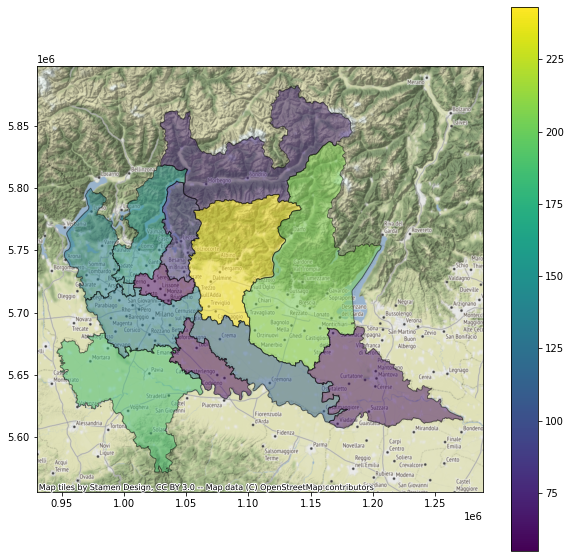

In [ ]:
'''nRegione = input('UNA REGIONE: ')'''
provinceUT = mProv[mProv['COD_REG'] == 3]
ax= provinceUT.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor="k", facecolor="red", column="COMUNE", legend=True)
contextily.add_basemap(ax)

2. Dato il nome di una autostrada che attraversa la Lombardia (inserito dall’utente), visualizzare su una mappa
il tracciato dell’autostrada e i parchi regionali che attraversa. I parchi devono essere colorati di verde ma in
trasparenza deve essere possibile vedere la mappa della Lombardia. Controllare che il nome dell’autostrada
sia presente nel dataset: in caso negativo dare un messaggio di errore.

In [ ]:
autostrade = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Autostrade_10000_CT10_line.zip")
autostrade.head()

TS_EID  ...                                           geometry
0    19.0  ...  LINESTRING (496352.634 4981573.415, 496378.384...
1    18.0  ...  LINESTRING (580517.421 4994637.417, 580735.915...
2    21.0  ...  LINESTRING (580524.796 4994628.417, 580745.039...
3    65.0  ...  LINESTRING (521699.514 5024872.823, 521630.139...
4    62.0  ...  LINESTRING (504384.530 5044095.266, 504414.405...

[5 rows x 4 columns]

In [ ]:
parchi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Parchi_regionali_e_nazionali_polygon.zip')
parchi.head()

FID  ...                                           geometry
0    5  ...  POLYGON ((587577.037 5107497.548, 587615.036 5...
1    6  ...  POLYGON ((586196.195 5100871.221, 586351.566 5...
2    7  ...  POLYGON ((486537.216 5078441.081, 486530.341 5...
3    8  ...  POLYGON ((617860.123 5053114.432, 617863.431 5...
4    1  ...  POLYGON ((584084.298 5161019.100, 583763.056 5...

[5 rows x 11 columns]

In [ ]:
cerca=input("inserire autostrada: ")
lombardia=Regioni[Regioni["DEN_REG"]=="Lombardia"]
lombardiaGeo=Regioni[Regioni["DEN_REG"]=="Lombardia"].geometry.squeeze()

autostrada=autostrade[autostrade["COD_PE"]==cerca]
if autostrada.empty:
  print("autostrada insesistente")
else:
    parchiAU= parchi[parchi.intersects(autostrada.unary_union)]
    autostradaGeo=autostrade[autostrade["COD_PE"]==cerca].geometry.squeeze()
    ax=autostrada.to_crs(epsg=3857).plot(figsize=(20,20),alpha=0.5,edgecolor="r",facecolor="none")
    parchiAU.to_crs(epsg=3857).plot(ax=ax, facecolor="g", alpha=0.5, edgecolor="b")
    contextily.add_basemap(ax)

3. Visualizzare tutti i comuni che si trovano a meno di una certa distanza (inserita dall’utente) da un comune
(inserito anch’esso dall’utente).

Inserisci un comune: Milano
Inserisci una distanza: 1


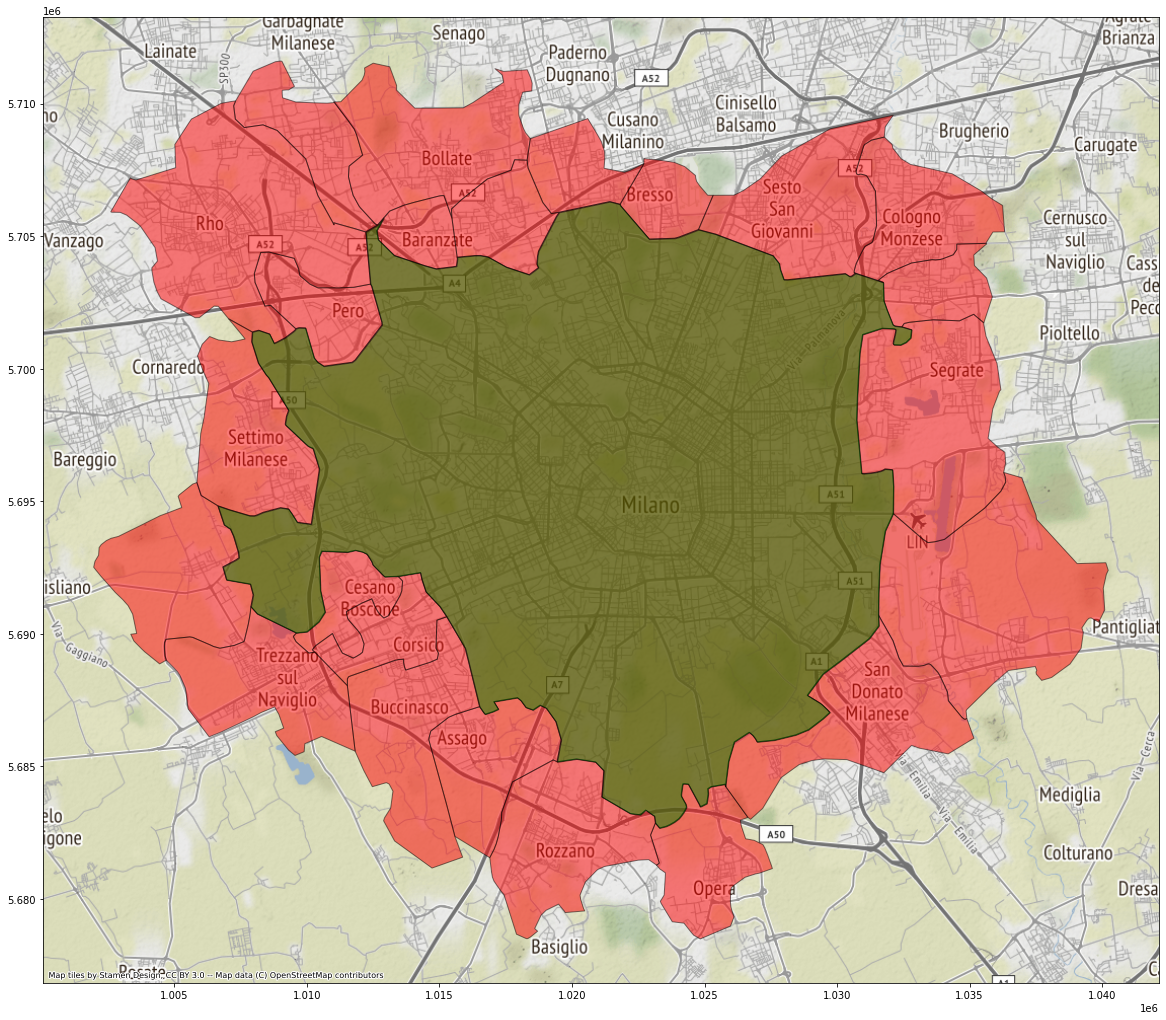

In [ ]:
nome_comune = input("Inserisci un comune: ")
distanza = int(input("Inserisci una distanza: "))

comune = comuni[comuni["COMUNE"] == nome_comune]
comune_squeeze = comune.geometry.squeeze()
comune_buffer = comune_squeeze.buffer(distanza)

comuni_in_distanza = comuni[comuni.intersects(comune_buffer)]

ax = comuni_in_distanza.to_crs(epsg = 3857).plot(edgecolor = "k", figsize = (20,20), facecolor = "red", alpha = 0.5)
comune.to_crs(epsg = 3857).plot(ax = ax, edgecolor = "black", facecolor = "green", alpha = 0.5)
contextily.add_basemap(ax)